In [1]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
df = pd.read_csv("../Binance/btcusdt.csv")
df

,Unnamed: 0,Open,Close,High,Low
0,0,739,736,739,736
1,1,736,742,742,736
2,2,742,736,742,736
3,3,736,733,736,733
4,4,733,730,733,730
...,...,...,...,...,...
323743,323743,1522,1528,1528,1522
323744,323744,1528,1531,1531,1528
323745,323745,1531,1534,1534,1531
323746,323746,1534,1528,1534,1528


In [3]:
# # #Check if any zero volumes are available
# indexZeros = df[ df['Volume'] == 0 ].index

# df.drop(indexZeros , inplace=True)
# df.loc[(df["Volume"] == 0 )]
# df.isna().sum()

In [4]:
df.head()

,Unnamed: 0,Open,Close,High,Low
0,0,739,736,739,736
1,1,736,742,742,736
2,2,742,736,742,736
3,3,736,733,736,733
4,4,733,730,733,730


In [5]:
import pandas_ta as ta
import talib

In [6]:
df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['EMA13'] = df.ta.ema(length=13)
df['EMA21'] = df.ta.ema(length=21)
# df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
# df['OBM'] = df.ta.obv()

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope

In [7]:
backrollingN = 5
df

,Unnamed: 0,Open,Close,High,Low,ATR,RSI,EMA13,EMA21
0,0,739,736,739,736,NaN,NaN,NaN,NaN
1,1,736,742,742,736,NaN,NaN,NaN,NaN
2,2,742,736,742,736,NaN,NaN,NaN,NaN
3,3,736,733,736,733,NaN,NaN,NaN,NaN
4,4,733,730,733,730,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
323743,323743,1522,1528,1528,1522,3.822366,51.937356,1524.651092,1525.545370
323744,323744,1528,1531,1531,1528,3.781248,54.632721,1525.558079,1526.041246
323745,323745,1531,1534,1534,1531,3.742186,57.216588,1526.764067,1526.764769
323746,323746,1534,1528,1534,1528,3.855076,50.964696,1526.940629,1526.877062


In [8]:
df['slopeRSI'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeEMA13'] = df['EMA13'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeEMA21'] = df['EMA21'].rolling(window=backrollingN).apply(get_slope, raw=True)
# df['slopeOBV'] = df['OBM'].rolling(window=backrollingN).apply(get_slope, raw=True)
# df['slopeMACD'] = df['MACD'].rolling(window=backrollingN).apply(get_slope, raw=True)
# df['slopeMACD_signal'] = df['MACD_signal'].rolling(window=backrollingN).apply(get_slope, raw=True)
# df['slopeMACD_hist'] = df['MACD_hist'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [9]:
df = df.dropna()
df

,Unnamed: 0,Open,Close,High,Low,ATR,RSI,EMA13,EMA21,slopeRSI,slopeEMA13,slopeEMA21
24,24,730,733,733,730,3.875556,49.748071,730.202531,729.129168,1.301003,-0.299551,-0.064893
25,25,733,727,733,727,3.981778,44.461578,729.745027,728.935607,1.282533,-0.128186,0.022824
26,26,727,733,733,727,4.082689,50.164706,730.210023,729.305097,1.730335,0.104412,0.157113
27,27,733,736,736,733,4.028555,52.775893,731.037162,729.913725,1.234464,0.260924,0.251921
28,28,736,739,739,736,3.977127,55.298270,732.174711,730.739750,1.941471,0.523649,0.419928
...,...,...,...,...,...,...,...,...,...,...,...,...
323743,323743,1522,1528,1528,1522,3.822366,51.937356,1524.651092,1525.545370,0.973331,0.223271,0.013341
323744,323744,1528,1531,1531,1528,3.781248,54.632721,1525.558079,1526.041246,1.150056,0.362804,0.121219
323745,323745,1531,1534,1534,1531,3.742186,57.216588,1526.764067,1526.764769,1.916837,0.610975,0.301108
323746,323746,1534,1528,1534,1528,3.855076,50.964696,1526.940629,1526.877062,1.525545,0.780835,0.437371


In [10]:
#Target flexible way
pipdiff = 500*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [11]:
# mytarget(barsfront to take into account, dataframe)
df['mytarget'] = mytarget(16, df)
df.tail()

C:\Users\hites\AppData\Local\Temp/ipykernel_25112/2438764458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mytarget'] = mytarget(16, df)


,Unnamed: 0,Open,Close,High,Low,ATR,RSI,EMA13,EMA21,slopeRSI,slopeEMA13,slopeEMA21,mytarget
323743,323743,1522,1528,1528,1522,3.822366,51.937356,1524.651092,1525.545370,0.973331,0.223271,0.013341,NaN
323744,323744,1528,1531,1531,1528,3.781248,54.632721,1525.558079,1526.041246,1.150056,0.362804,0.121219,NaN
323745,323745,1531,1534,1534,1531,3.742186,57.216588,1526.764067,1526.764769,1.916837,0.610975,0.301108,NaN
323746,323746,1534,1528,1534,1528,3.855076,50.964696,1526.940629,1526.877062,1.525545,0.780835,0.437371,NaN
323747,323747,1528,1525,1528,1525,3.812323,48.132751,1526.663396,1526.706420,-1.127724,0.540716,0.315792,NaN


In [12]:
df = df.dropna()
attributes = ['ATR', 'RSI','EMA13','EMA21','slopeEMA13','slopeEMA21', 'slopeRSI']
x = df[attributes]
y = df['mytarget']
print(x)

             ATR        RSI        EMA13        EMA21  slopeEMA13  slopeEMA21  \
24      3.875556  49.748071   730.202531   729.129168   -0.299551   -0.064893   
25      3.981778  44.461578   729.745027   728.935607   -0.128186    0.022824   
26      4.082689  50.164706   730.210023   729.305097    0.104412    0.157113   
27      4.028555  52.775893   731.037162   729.913725    0.260924    0.251921   
28      3.977127  55.298270   732.174711   730.739750    0.523649    0.419928   
...          ...        ...          ...          ...         ...         ...   
323725  3.681695  51.744363  1531.928076  1529.821917    0.730418    0.674163   
323726  3.647610  48.680999  1531.366923  1529.656288    0.111787    0.285603   
323727  3.765230  54.484731  1531.743076  1530.051171   -0.075611    0.150548   
323728  3.726968  57.097304  1532.494066  1530.682882    0.063762    0.218680   
323729  3.690620  59.594954  1533.566342  1531.529893    0.440367    0.444255   

        slopeRSI  
24      

In [13]:
df.isna().sum()
df.shape

(323706, 13)

In [14]:
df.to_csv('mat2.csv')

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(xtrain, ytrain)
y_pred_train = model.predict(xtrain)
y_pred_test = model.predict(xtest)

In [19]:
from sklearn.metrics import accuracy_score
accurancy_train = accuracy_score(ytrain, y_pred_train)
accuracy_tesst = accuracy_score(ytest, y_pred_test)

print("accuracy train %.f%% "% (accurancy_train*100))
print("accuracy test %.f%% "% (accuracy_tesst*100))

accuracy train 100% 
accuracy test 77% 


In [20]:
# print(df['mytarget'].value_counts()*100/df['mytarget'].count())


# pred_test = np.random.choice([0,1,2], len(y_pred_test))
# accuracy_tesst = accuracy_score(ytest, pred_test)
# print("accuracy gambler %.2f%%" %(accuracy_tesst*100))

In [21]:
train_index = int(0.8 * len(x))
xtrain_seq, xtest_seq = x[:train_index], x[train_index:]
ytrain_seq, ytest_seq = y[:train_index], y[train_index:]

In [22]:
model2 = RandomForestClassifier()
model2.fit(xtrain_seq, ytrain_seq)

RandomForestClassifier()

In [23]:
y_pred_train = model.predict(xtrain_seq)
y_pred_test = model.predict(xtest_seq)

In [24]:
from sklearn.metrics import accuracy_score
accurancy_train = accuracy_score(ytrain_seq, y_pred_train)
accuracy_tesst = accuracy_score(ytest_seq, y_pred_test)

print("accuracy train %.f%% "% (accurancy_train*100))
print("accuracy test %.f%% "% (accuracy_tesst*100))

accuracy train 96% 
accuracy test 95% 


In [25]:
print(df['mytarget'].value_counts()*100/df['mytarget'].count())

pred_test = np.random.choice([0,1,2], len(y_pred_test))
accuracy_tesst = accuracy_score(ytest_seq, pred_test)
print("accuracy gambler %.2f%%" %(accuracy_tesst*100))

2.0    50.041396
1.0    49.958604
Name: mytarget, dtype: float64
accuracy gambler 33.00%


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd



# Create the contingency mat
matrix_test = confusion_matrix(ytest_seq, y_pred_test)
matrix_train = confusion_matrix(ytrain_seq, y_pred_train)
classification_report_pred = classification_report(ytest_seq, y_pred_test, target_names=["downtrend", "uptrend"])

# Convert the matrix to a DataFrame for easy display

matrix_df_test = pd.DataFrame(matrix_test, columns=['pred_Downtrend','pred_Uptrend'], index=['Downtrend','Uptrend'])
# matrix_df_test = pd.DataFrame(matrix_test, columns=['prered_sideways','pred_Downtrend','pred_Uptrend'], index=['Sidetrend','Downtrend','Uptrend'])

matrix_df_train = pd.DataFrame(matrix_train, columns=['pred_Downtrend','pred_Uptrend'], index=['Downtrend','Uptrend'])
# matrix_df_train = pd.DataFrame(matrix_train, columns=['pred_sideways','pred_Downtrend','pred_Uptrend'], index=['Sidetrend','Downtrend','Uptrend'])
print("Test-Set Confusion Matrix\n")
print(matrix_df_test)
print("-----------------------------------------------------------------------------")
print("Train-Set Confusion Matrix\n")
print(matrix_df_train)
print("-----------------------------------------------------------------------------")
print("Classification Report\n")
print(classification_report_pred)

Test-Set Confusion Matrix

           pred_Downtrend  pred_Uptrend
Downtrend           30873          1721
Uptrend              1746         30402
-----------------------------------------------------------------------------
Train-Set Confusion Matrix

           pred_Downtrend  pred_Uptrend
Downtrend          123421          5704
Uptrend              5848        123991
-----------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

   downtrend       0.95      0.95      0.95     32594
     uptrend       0.95      0.95      0.95     32148

    accuracy                           0.95     64742
   macro avg       0.95      0.95      0.95     64742
weighted avg       0.95      0.95      0.95     64742



In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt  

[]

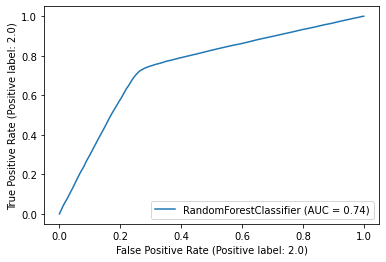

In [31]:
metrics.plot_roc_curve(model2, xtest_seq, ytest_seq)
plt.plot()

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

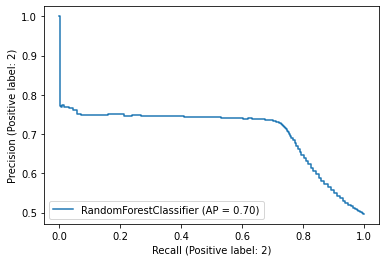

In [35]:
# Calculate precision-recall curve values for the classifier
y_scores = model2.predict_proba(xtest_seq)[:, 1]
precision, recall, thresholds = precision_recall_curve(ytest_seq, y_scores, pos_label=2)

# Plot the precision-recall curve
plot_precision_recall_curve(model2, xtest_seq, ytest_seq, pos_label=2)